In [8]:
import os
import numpy as np
import librosa
import scipy as sp
import matplotlib.pyplot as plt
import pywt
import sounddevice as sd
import soundfile as sf
import string
from scipy import signal
from pydub import AudioSegment
import math
from matplotlib.pyplot import figure

In [25]:
sr = 22050
y, fs = librosa.load('salsa_excerpt.mp3',sr)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


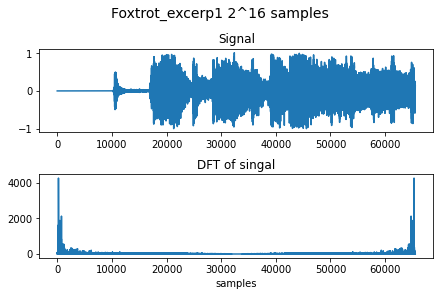

In [48]:
#4.1
soundsnippet=y[0:65536]
t=np.linspace(0,65536,65536)
DFT=np.fft.fft(soundsnippet)

fig, axs = plt.subplots(2, constrained_layout=True)
fig.suptitle('Foxtrot_excerp1 2^16 samples', fontsize=14)
axs[0].plot(t, soundsnippet)
axs[0].set_title('Signal')
axs[1].plot(t,np.abs(DFT))
axs[1].set_title('DFT of singal')
plt.xlabel('samples')
plt.show()

In [27]:
#4.2
#nomizo einai sosto (logika lol idk)
coeffs7=pywt.wavedec(soundsnippet,'db4',level=7)
approx,detail7,detail6,detail5,detail4,detail3,detail2,detail1=coeffs7
print(len(detail1))
print(len(detail2))
print(len(detail3))
print(len(detail4))
print(len(detail5))
print(len(detail6))
print(len(detail7))
print(len(approx))

32771
16389
8198
4102
2054
1030
518
518


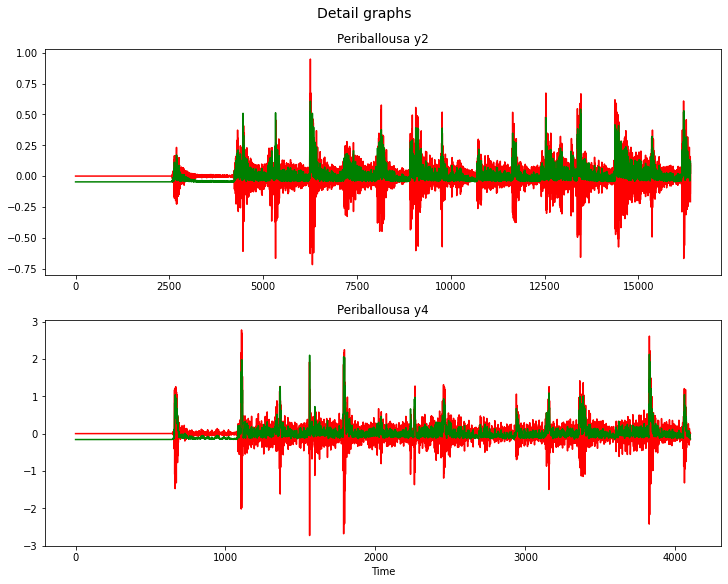

In [70]:
#ston tipo tou filtrou (https://pywavelets.readthedocs.io/en/latest/ref/dwt-discrete-wavelet-transform.html)
#orizoume pinaka me ta a kai ta b constants (apo ton tipo tou filtrou)


abs_detail2=abs(detail2)
abs_detail4=abs(detail4)

a0=[0.001,0.002,0.005]
a=a0[2]*(2**7)

#i=2
#constant a
a_stather_array2=([0]*len(detail2))
a_stather_array2[0]=1
a_stather_array2[1]=a-1

#constant b
b_stather_array2=([0]*(len(detail2)))
b_stather_array2[0]=a

t2=np.linspace(0,len(detail2),len(detail2))
lpf2=signal.lfilter(b_stather_array2,a_stather_array2,abs_detail2)


#i=4
#constant a
a_stather_array4=([0]*len(detail4))
a_stather_array4[0]=1
a_stather_array4[1]=a-1

#constant b
b_stather_array4=([0]*(len(detail4)))
b_stather_array4[0]=a

t4=np.linspace(0,len(detail4), len(detail4))
lpf4=signal.lfilter(b_stather_array4,a_stather_array4,abs_detail4)

#kentrarisma
x2_kentrarismeno=lpf2-np.mean(lpf2)
x4_kentrarismeno=lpf4-np.mean(lpf4)


fig, axs = plt.subplots(2, constrained_layout=True)
fig.set_size_inches(10, 8, forward=True)
fig.suptitle('Detail graphs', fontsize=14)
axs[0].plot(t2,detail2,'r')
axs[0].plot(t2,x2_kentrarismeno,'g')
axs[0].set_title('Periballousa y2')
axs[1].plot(t4,detail4,'r')
axs[1].plot(t4,x4_kentrarismeno,'g')
axs[1].set_title('Periballousa y4')
plt.xlabel('Time')
plt.show()

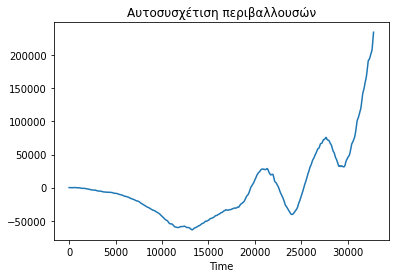

In [71]:
#ston tipo tou filtrou (https://pywavelets.readthedocs.io/en/latest/ref/dwt-discrete-wavelet-transform.html)
#orizoume pinaka me ta a kai ta b constants (apo ton tipo tou filtrou)
a_arr=([0]*7) #a_const_array
b_arr=([0]*7) #b_const_array
lpf_all=([0]*8) #ta details+approximation perasmena apo lpf
detail_array=[detail1,detail2,detail3,detail4,detail5,detail6,detail7,approx] #details+approximation array
x_kentrarismena=([0]*8) #to kentrarisma ton perivallouson me tin afairesi tis mesis timis

#ftiaxnoume tous pinakes ton a_const kai b_const kai ipologizo tis perivallouses gia ta details+approx
for i in range(7):
        a_arr[i]=([0]*len(detail_array[i]))
        a_arr[i][0]=1
        a_arr[i][1]=a-1
        b_arr[i]=([0]*len(detail_array[i]))
        b_arr[i][0]=a
        lpf_all[i]=signal.lfilter(b_arr[i],a_arr[i],abs(detail_array[i]))
        x_kentrarismena[i]=lpf_all[i]-np.mean(lpf_all[i]) 


new_xloc_array=([0]*8)
xloc_array=([0]*8)
new_lpf_array=([0]*8)
#thelo na fero me interpolation ola ta details+approx sto megethos tou detail1
#ara orizoume pinakes gia ta current megethi ton perivallouson kai ta megethi pou theloume na exoun
newsize=len(detail1)

#gia kathe detail ipologizoume to megethos pou exoun idi kai to apothikeuoume se pinaka
for i in range(8):
    xloc_array[i]=np.arange(len(detail_array[i]))
    
    #apothikeuoume se pinaka ta linspace pou theloume na exoun ola ta simata meta to interpolation
    new_xloc_array[i]=np.linspace(0,len(detail_array[i]),newsize) 
        
#kanoume to interpolation gia ta details
for i in range(7):    
    new_lpf_array[i]=np.interp(new_xloc_array[i],xloc_array[i],x_kentrarismena[i])

#kanoume tin diadikasia gia to approx
lpf_all[7]=signal.lfilter(b_arr[6],a_arr[6],abs(approx))
x_kentrarismena[7]=lpf_all[7]-np.mean(lpf_all[7])
new_lpf_array[7]=np.interp(new_xloc_array[7],xloc_array[7],x_kentrarismena[7])

#prosthetoume oles tis perivallouses
interp_value=sum(new_lpf_array)

#kanoume autocorrelate kai pairnoume to miso graphima logo simmetrikotitas
result = np.correlate(interp_value, interp_value, mode='full')
result2 = result[:len(result)//2]


t=np.linspace(0,32770,32770)
plt.plot(t,result2)
plt.title('Αυτοσυσχέτιση περιβαλλουσών')
plt.xlabel('Time')
plt.show()

In [1]:
extrema_new=sp.ndimage.gaussian_filter1d(result2,40)
extrema=signal.argrelextrema(extrema_new,np.greater)
print('BPM of signal is:')
for i in range(len(extrema)):
    print((60*22050)/extrema[i])
print("Extrema of autocorrelation are:")
print(extrema)

NameError: name 'sp' is not defined